In [3]:
import matplotlib.pylab as plt
import numpy as np
import serial
import time

plt.rcParams['figure.figsize'] = 15, 10

In [16]:
volts = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8]
counts = [1799, 3855, 5911, 7967, 10020, 11820, 13870, 15930, 17990, 20040, 23900, 28010, 32120]

Error = 0.05384930944892652 for 1
Error = 0.05393492085086038 for 2
Error = 0.049303965831038354 for 3
Error = 0.04780713335905462 for 4
Error = 0.039166257233767876 for 5
Error = 0.03805217417302087 for 6
Error = 0.03368239172579646 for 7
Error = 0.027128494613558374 for 8
Error = 0.02297798078515534 for 9


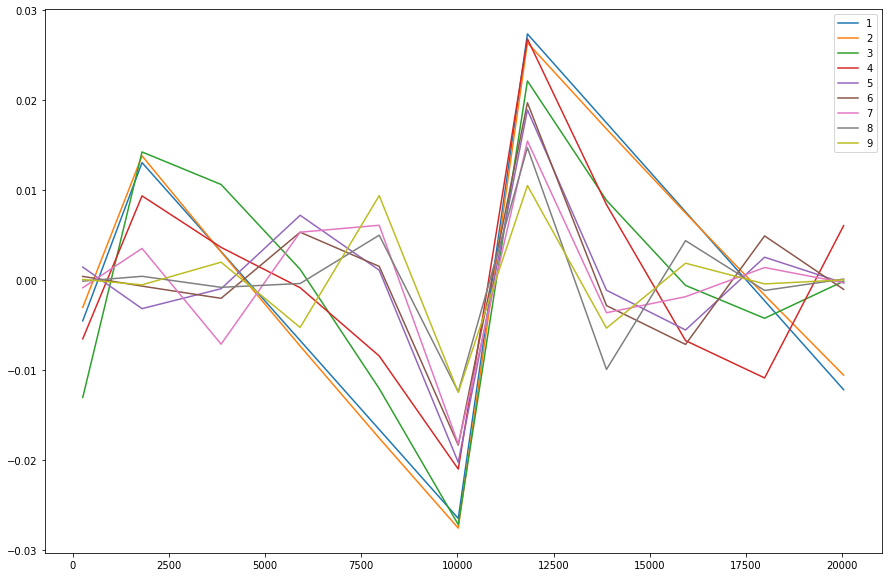

In [38]:
volts = [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
counts = [257, 1799, 3855, 5911, 7967, 10023, 11822, 13878, 15934, 17990, 20046]


for i in range(1, 10):
    z = np.polyfit(counts, volts, i)
    p = np.poly1d(z)
    plt.plot(counts, volts - p(counts), label=i)
    print(f'Error = {np.max(volts - p(counts)) - np.min(volts - p(counts))} for {i}')
    
plt.legend()
plt.show()


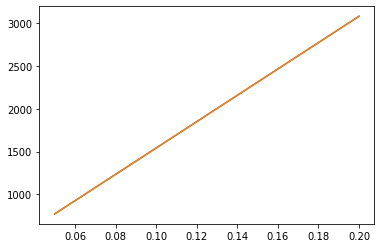

 
1.542e+04 x - 5.29e-13


In [23]:
amps = [0.05, 0.1, 0.15, 0.2]
counts = [771, 1542, 2313, 3084]

z = np.polyfit(amps, counts, 1)
p = np.poly1d(z)
plt.plot(amps, counts)
plt.plot(amps, p(amps))
plt.show()

print(p)

In [32]:
def set_voltage(v):
    
    cmd = f'psu set_voltage {v}\n'
    
    ser.write(cmd.encode())
    
    try:
        line = ser.readline().decode()
        
    except:
        return False
    
    if 'OK' in line:
        return True
    
    return False

def get_voltage():
    
    while ser.readline():
        pass
    
    cmd = f'psu get_voltage\n'
    
    ser.write(cmd.encode())
    
    line = ser.readline().decode()
    
    return float(line.replace('V', ''))

In [5]:
ser = serial.Serial(port='/dev/tty.usbserial-D308VIO8', baudrate=921600, timeout=1)

In [26]:
volts = np.arange(0.01, 5, 0.01)

In [33]:
ser = serial.Serial(port='/dev/tty.usbserial-D308VIO8', baudrate=921600, timeout=1)

delay = 2

print(f'Will take {len(volts) * delay * (1/60)} minutes')

counts = []

for v in volts:
    
    while not set_voltage(v):
        time.sleep(delay)
    
    time.sleep(delay)
    
    counts.append(get_voltage())
    
print('Done')

ser.close()

Will take 16.633333333333333 minutes


KeyboardInterrupt: 

In [22]:
ser.close()

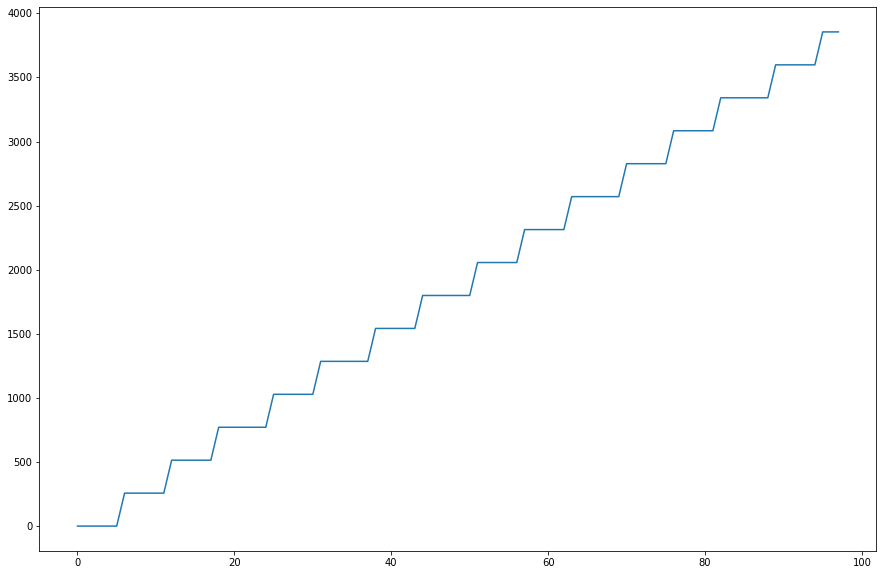

In [34]:
plt.plot(counts)

plt.show()
